In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

# Numerical Types
Numpy gives us a rich set of types. usually in the name it says how many bits are needed to store the value.


In [181]:
print (np.int8(1))
print (np.int16(300))
print (np.int8(300)) # 8 bits can only hold 0 to 255

1
300
44


In [182]:
print (np.int8(1).itemsize)
print (np.int16(300).itemsize)


1
2


# Underlying Byte Array
Python list is a very big object as each element has an overhead of pointers. Numpy uses a ndarray (bytearray). Behind the scenes, the array is always one dimensional. The array's metadata is a set of flags and properties that actually make the array what it is.
* `size` is the actual number of elements in the array.
* `shape` is how many elements on each dimension, while `ndim` is the number of dimensions.
* an array can only have one `dtype`.
* `strides` are how many bytes of data the pointer needs to go, for the next element in each dimension.
![ndarray](https://docs.scipy.org/doc/numpy/_images/threefundamental.png)


In [183]:
d1 = np.arange(16, dtype=np.int8)
d1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int8)

In [184]:
def info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print(f'data type: {a.dtype} with item size {a.itemsize}')
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)

In [186]:
d1 = np.arange(16,dtype=np.int8)
info(d1)
print (d1)

number of elements: 16
number of dimensions: 1
shape: (16,)
data type: int8 with item size 1
strides: (1,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [189]:
d2 = d1.reshape(4,-1)
info(d2)
print(d2)

number of elements: 16
number of dimensions: 2
shape: (4, 4)
data type: int8 with item size 1
strides: (4, 1)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


* `OWNDATA` for d2 is false.
* `strides` has `ndim` number of elements.

## View

In [190]:
d16 = np.array([[1,300],[5,10]], dtype='int16')
d16

array([[  1, 300],
       [  5,  10]], dtype=int16)

In [191]:
info(d16) # Notice how strides is changed

number of elements: 4
number of dimensions: 2
shape: (2, 2)
data type: int16 with item size 2
strides: (4, 2)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



We can view this array, on how it is "broken" into int8 "parts". Notice that int8 can get up to 255. so 300 needs to be represtend as two int8 "parts" - `1*256 + 44*1`

In [192]:
d16.view(np.int8)

array([[ 1,  0, 44,  1],
       [ 5,  0, 10,  0]], dtype=int8)

But we can also "squash" them into int32

In [60]:
d16.view(np.int32)

array([[19660801],
       [  655365]], dtype=int32)

In [61]:
print (300 * 2 ** 16+44)
print (10 * 2 ** 16 + 5)

19660844
655365


## Slicing 

In [194]:
d3 = d2[::2,:3]

In [196]:
info(d3)
print(d3)

number of elements: 6
number of dimensions: 2
shape: (2, 3)
data type: int8 with item size 1
strides: (8, 1)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

[[ 0  1  2]
 [ 8  9 10]]


In [197]:
d3.base

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int8)

In [198]:
d3[0] = 40

In [201]:
d2

array([[40, 40, 40,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]], dtype=int8)

# Broadcasting

In [205]:
d3_3 = np.arange(9).reshape(3,3)
d3_1 = np.arange(100,400,100).reshape(3,1)
print(d3_3.shape)
print(d3_1.shape)

(3, 3)
(3, 1)


In [209]:
d3_3 + d3_1

array([[100, 101, 102],
       [203, 204, 205],
       [306, 307, 308]])

It works. But why?  
In numpy, if an axis has a size of 1, it can be broadcasted.

In [211]:
d3_1

array([[100],
       [200],
       [300]])

In [210]:
d3_1_broad = np.broadcast_to(d3_1, (3,3))
d3_1_broad 

array([[100, 100, 100],
       [200, 200, 200],
       [300, 300, 300]])

## 🤯 Moment
It seemd like data has been duplicated. But was it?

In [213]:
info(d3_1)

number of elements: 3
number of dimensions: 2
shape: (3, 1)
data type: int64 with item size 8
strides: (8, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [212]:
info(d3_1_broad)

number of elements: 9
number of dimensions: 2
shape: (3, 3)
data type: int64 with item size 8
strides: (8, 0)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



## Padding
numpy know how to add `(3,3)` with `(3,1)`. But it can also add shape `(3,3)` with `(3,)`. This is due to paddin. if two arrays don't have the same `ndim`, numpy add a dimension from the left (left pad).

In [106]:
d3_ = np.array([100,200,300])
print (d3_.shape)

(3,)


In [216]:
d3_3 + d3_

array([[100, 201, 302],
       [103, 204, 305],
       [106, 207, 308]])

This add the array to each column. `(3,)` was padded as `(1,3)`, which means the broadcasting went "down" instead of "right".

# Stride Tricks

In [217]:
from numpy.lib.stride_tricks import as_strided

In [218]:
d1

array([40, 40, 40,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int8)

In [220]:
# reshape
as_strided(d1, (4,4), (4,1))

array([[40, 40, 40,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]], dtype=int8)

In [112]:
# Transpose - Flip the strides
as_strided(d2, (4,4), (1,4))

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]], dtype=int8)

## Handle with care
Avoid reading garbage from after the array's end.

In [221]:
as_strided(d2, (4,4), (8,1))

array([[40, 40, 40,  3],
       [ 8,  9, 10, 11],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]], dtype=int8)

## Sliding Window with stride tricks.

number of elements: 100
number of dimensions: 1
shape: (100,)
data type: float64 with item size 8
strides: (8,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



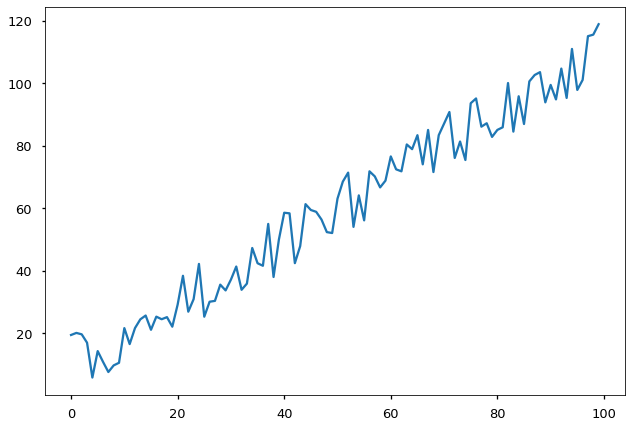

In [128]:
arr = np.arange(100) + np.random.rand(100,) * 20

plt.plot(arr)
info(arr)

In [227]:
d1 = np.arange(16)

In [228]:
# d1 sliding window 3
new_shape = (16-3+1, 3)
s = 8
new_stride = (8,8)
as_strided(d1, new_shape, new_stride)

array([[ 0,  1,  2],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11],
       [10, 11, 12],
       [11, 12, 13],
       [12, 13, 14],
       [13, 14, 15]])

In [229]:
# Sliding window
def sliding_window(a, window):
    new_shape = (len(a) - window + 1, window)
    s = a.strides[0]
    new_stride = (s, s)
    return as_strided(a, new_shape, new_stride)
sliding_window(d1, 3) # Check it

array([[ 0,  1,  2],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11],
       [10, 11, 12],
       [11, 12, 13],
       [12, 13, 14],
       [13, 14, 15]])

In [230]:
# smooth
def smooth(a, window=3):
    sw = sliding_window(a, window)
    return sw.mean(axis=1)

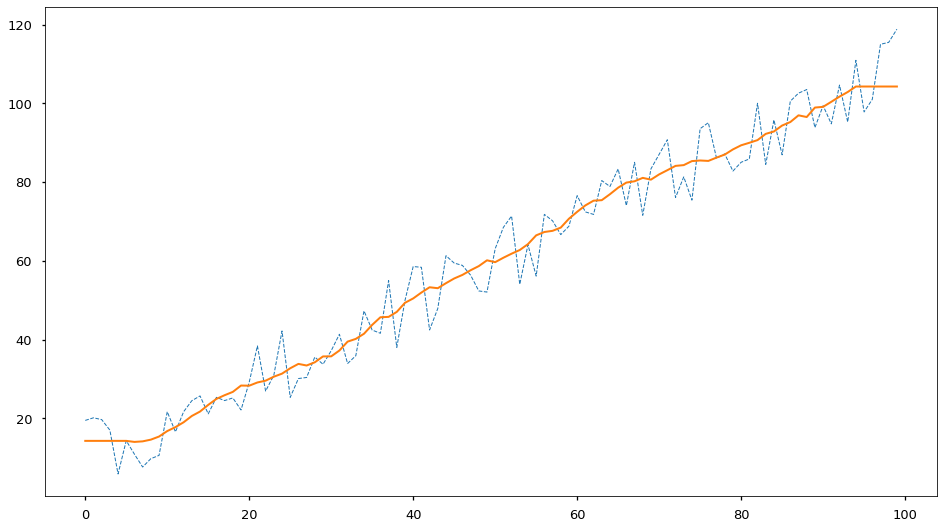

In [232]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(arr, linewidth=1, linestyle='--')
ax.plot(np.pad(smooth(arr,11),5, mode='edge'), linewidth=2)

# Edge Detection
Edge detection is done by taking a sliding window of 3x3 and multiplying by the filter: 
```
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]```
 
**Example:**
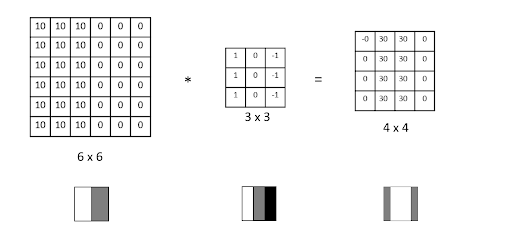

Load the Image

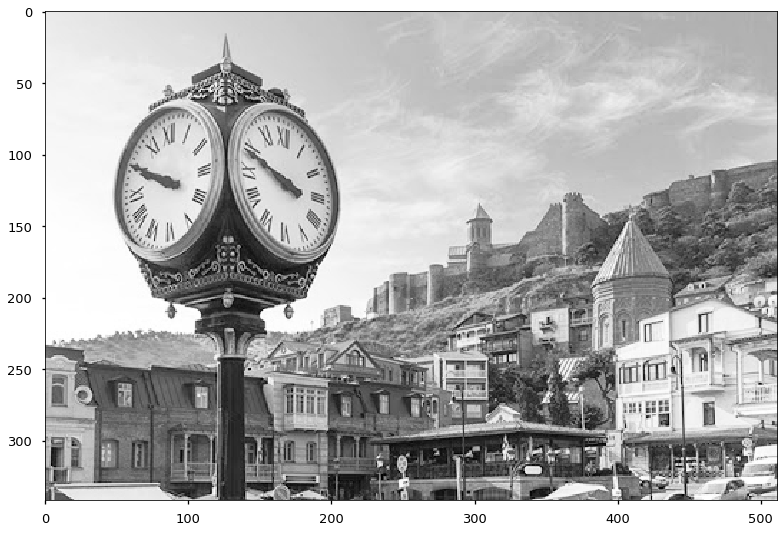

In [233]:
img = np.loadtxt('../rsrc/tbilisi.npy')

fix, ax = plt.subplots(figsize=(16,9))
ax.imshow(img,cmap='Greys')

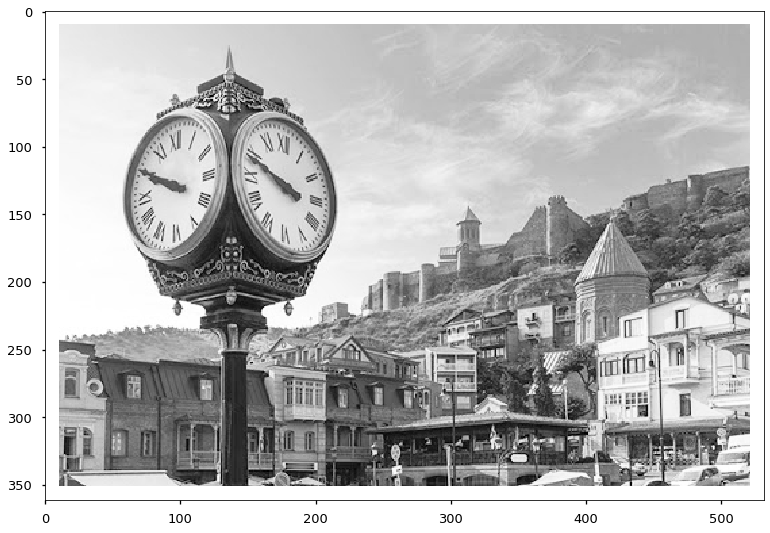

In [234]:
new_img = np.pad(img,10)
fix, ax = plt.subplots(figsize=(16,9))
ax.imshow(new_img,cmap='Greys')

In [235]:
d2 = np.arange(16).reshape(4,4) + 1
d2

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [236]:
# ex
# Write a sliding window function
def sliding_window_2d(img, window):
    # BOE
    padding = window - 1
    padded = np.pad(img, padding,mode='reflect')
    r, c = img.shape
    new_shape = (r, c,window, window)
    s0, s1 = padded.strides
    new_stride = (s0, s1, s0, s1)
    return as_strided(padded, new_shape, new_stride)
    # EOE
sw = sliding_window_2d(d2, 3)
print (sw.shape)

print (sw.mean(axis=-1).mean(axis=-1))

(4, 4, 3, 3)
[[ 6.          5.66666667  6.          7.        ]
 [ 4.66666667  4.33333333  4.66666667  5.66666667]
 [ 6.          5.66666667  6.          7.        ]
 [10.          9.66666667 10.         11.        ]]


In [237]:
new_img = sliding_window_2d(img,7)
print(new_img.shape)
print(img.shape)

(342, 512, 7, 7)
(342, 512)


(342, 512)


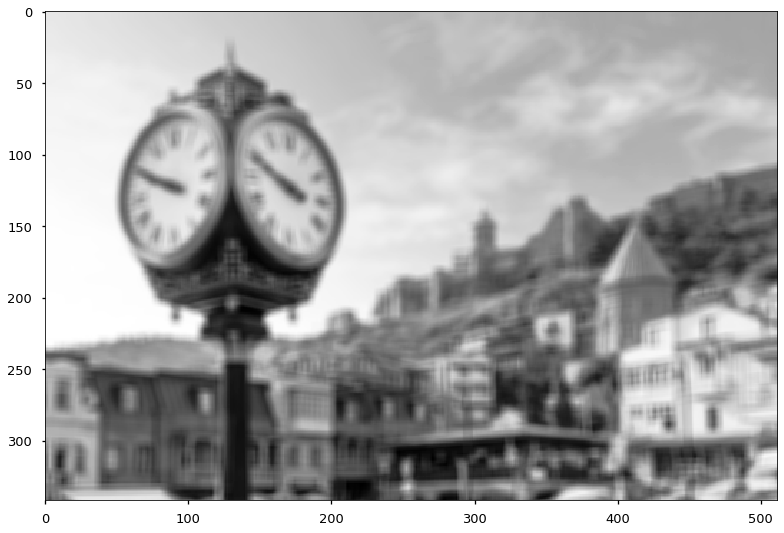

In [148]:
new_img = new_img.mean(axis=-1).mean(axis=-1)
print(new_img.shape)
fix, ax = plt.subplots(figsize=(16,9))
ax.imshow(new_img,cmap='Greys')

In [240]:
new_img = sliding_window_2d(img,3)
new_img.shape

(342, 512, 3, 3)

In [241]:
filt = (np.array([[1,0,-1],[1,0,-1],[1,0,-1]]))
print (filt.shape)
print(filt)

(3, 3)
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


In [244]:
new_img = sliding_window_2d(img,3)
print(new_img.shape)
new_img = new_img * filt
# "Flatten"
new_img = new_img.sum(axis=-1).sum(axis=-1)
# Normalize
new_img = (new_img - new_img.min())
new_img /=  new_img.max()

(342, 512, 3, 3)


0.0 1.0


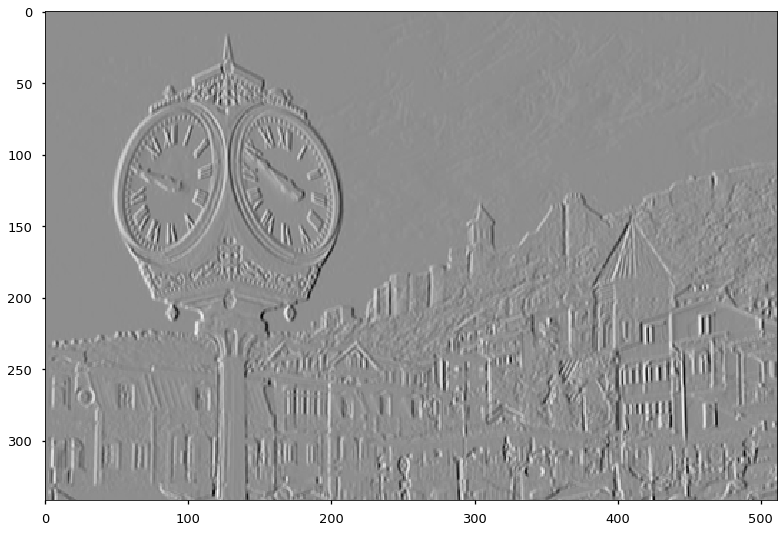

In [245]:
fix, ax = plt.subplots(figsize=(16,9))


print(new_img.min(),new_img.max())
ax.imshow(new_img,cmap='Greys')

# Wrap it Up
[REF](https://jessicastringham.net/2017/12/31/stride-tricks/)

In [246]:
def filter_image(img, filt):
    window, c = filt.shape
    assert window == c, "Filter should be square"
    new_img = sliding_window_2d(img, window)
    new_img = new_img * filt
    # "Flatten"
    new_img = new_img.sum(axis=-1).sum(axis=-1)
    # Normalize
    new_img = (new_img - new_img.min())
    new_img /=  new_img.max()
    return new_img    

def draw(img):
    fix, ax = plt.subplots(figsize=(16,9))
    ax.imshow(img,cmap='Greys')
    plt.show()


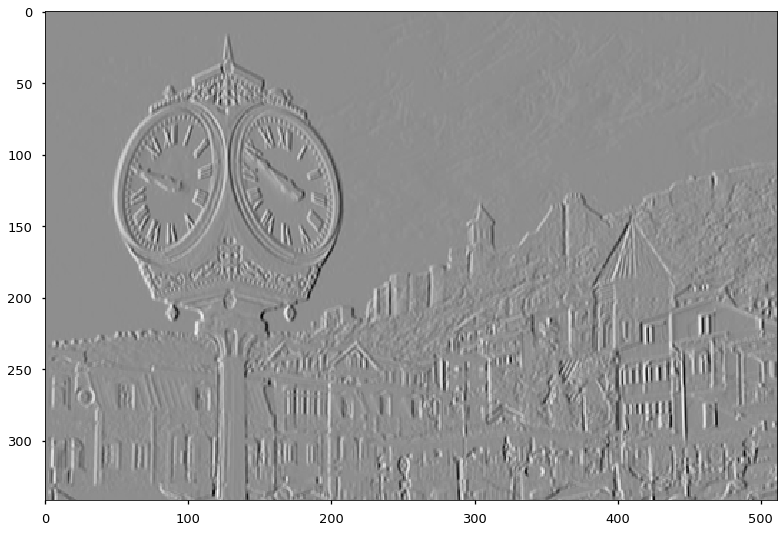

In [247]:
draw(filter_image(img, filt))

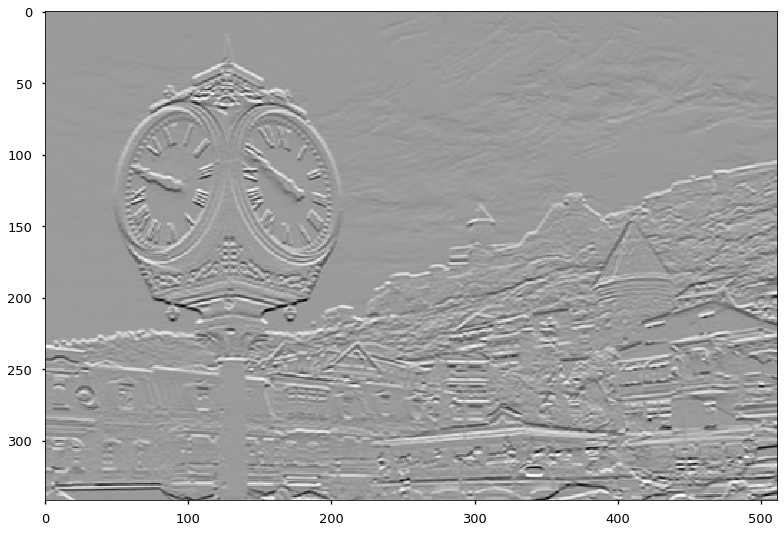

In [249]:
draw(filter_image(img, filt.T))

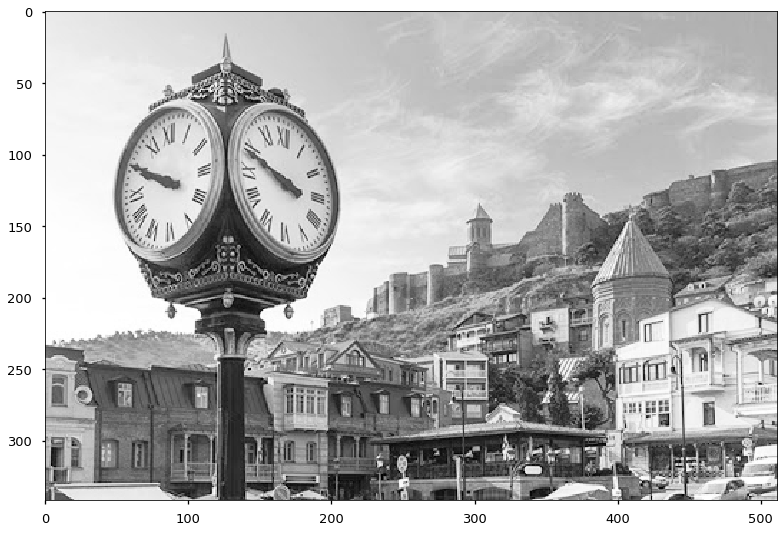

In [250]:
draw(img)

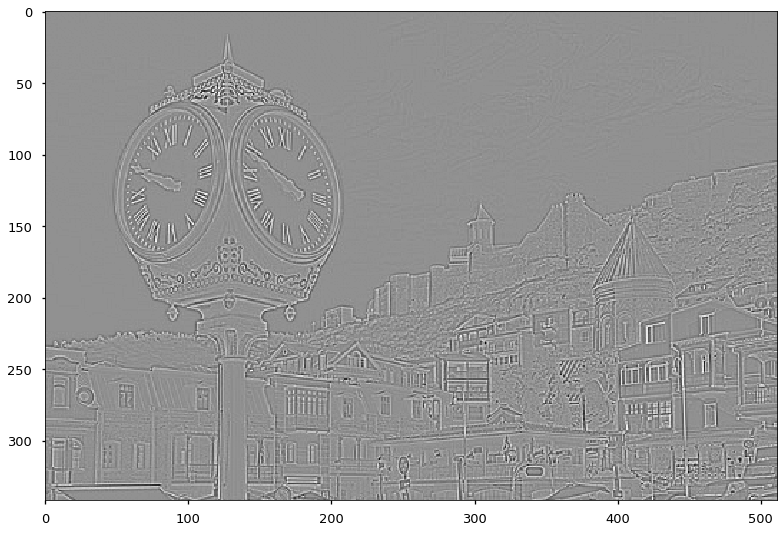

In [251]:
filt2 = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])
draw(filter_image(img, filt2))

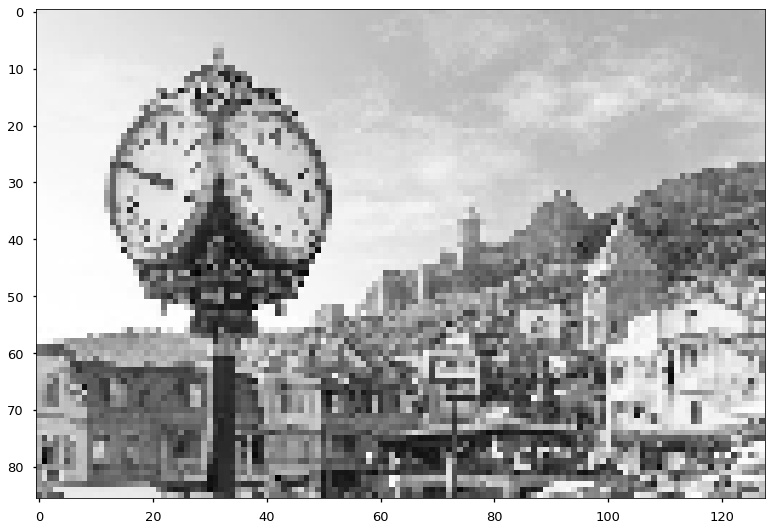

In [252]:
draw(img[::4,::4])

In [253]:
smooth_mean = np.array([
   [0. , 0. , 0.5, 0. , 0. ],
   [0. , 0.5, 1. , 0.5, 0. ],
   [0.5, 1. , 2. , 1. , 0.5],
   [0. , 0.5, 1. , 0.5, 0. ],
   [0. , 0. , 0.5, 0. , 0. ]
])
(smooth_mean)

array([[0. , 0. , 0.5, 0. , 0. ],
       [0. , 0.5, 1. , 0.5, 0. ],
       [0.5, 1. , 2. , 1. , 0.5],
       [0. , 0.5, 1. , 0.5, 0. ],
       [0. , 0. , 0.5, 0. , 0. ]])

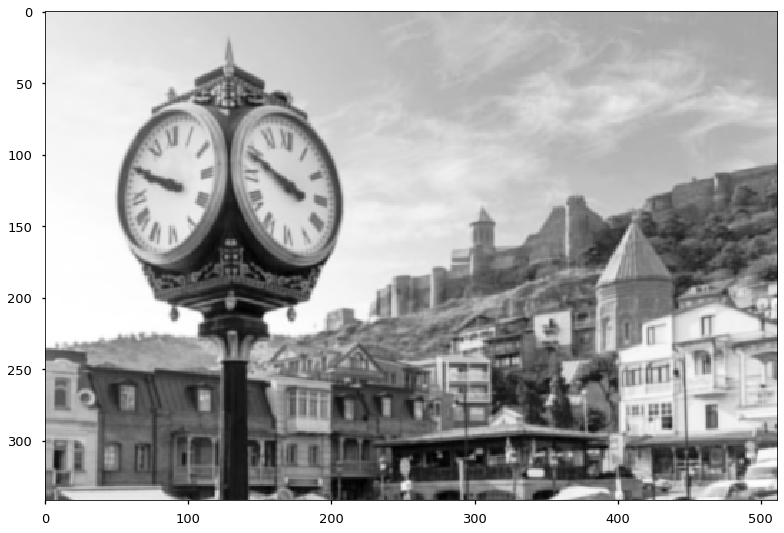

In [178]:
draw(filter_image(img, smooth_mean))